In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv
/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv
/kaggle/input/shakespeare/shakespeare.txt
/kaggle/input/student-depression-text/Depression_Text.xlsx


# Text Preprocessing with NLTK

In [2]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2025-04-06 11:11:35--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-06 11:11:36--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-06 11:11:36--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [3]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [4]:
import pandas as pd

df = pd.read_excel('/kaggle/input/student-depression-text/Depression_Text.xlsx')
df = df[['text', 'label']]
df = df.dropna()

In [23]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer

sentences = df[:5]['text'].tolist()

# Tokenize each sentence into words
tokenized = [sentence.lower().split() for sentence in sentences]

# One-hot encoding using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
one_hot = mlb.fit_transform(tokenized)

# Show the result
import pandas as pd
one_hot_df = pd.DataFrame(one_hot, columns=mlb.classes_)
print("One-Hot Encoding:")
print(one_hot_df)

One-Hot Encoding:
   a  actually  alive  already  any  are  being  case.  comimg  dead  ...  \
0  0         0      0        0    0    0      0      0       0     0  ...   
1  0         0      1        0    0    0      1      0       0     1  ...   
2  0         0      0        1    0    1      0      0       1     0  ...   
3  0         0      0        0    0    0      0      0       0     0  ...   
4  1         1      0        0    1    0      0      1       0     0  ...   

   picture  ready  so  though  to  very  when  who  worried,  you  
0        0      0   0       0   0     0     0    0         0    0  
1        0      0   1       0   0     0     1    0         0    0  
2        0      0   0       0   0     1     0    0         0    0  
3        1      0   0       0   0     0     0    0         0    0  
4        0      1   0       1   1     0     0    1         1    1  

[5 rows x 39 columns]


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Compute TF-IDF for the same set of sentences
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Convert to DataFrame for readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("\nTF-IDF Scores:")
print(tfidf_df.round(2))


TF-IDF Scores:
   actually  alive  already   any   are  being  case  comimg  dead  depressed  \
0      0.00   0.00     0.00  0.00  0.00   0.00  0.00    0.00  0.00       0.00   
1      0.00   0.35     0.00  0.00  0.00   0.35  0.00    0.00  0.35       0.00   
2      0.00   0.00     0.39  0.00  0.39   0.00  0.00    0.39  0.00       0.39   
3      0.00   0.00     0.00  0.00  0.00   0.00  0.00    0.00  0.00       0.00   
4      0.23   0.00     0.00  0.23  0.00   0.00  0.23    0.00  0.00       0.00   

   ...  picture  ready    so  though    to  very  when   who  worried   you  
0  ...     0.00   0.00  0.00    0.00  0.00  0.00  0.00  0.00     0.00  0.00  
1  ...     0.00   0.00  0.35    0.00  0.00  0.00  0.35  0.00     0.00  0.00  
2  ...     0.00   0.00  0.00    0.00  0.00  0.39  0.00  0.00     0.00  0.00  
3  ...     0.71   0.00  0.00    0.00  0.00  0.00  0.00  0.00     0.00  0.00  
4  ...     0.00   0.23  0.00    0.23  0.23  0.00  0.00  0.23     0.23  0.46  

[5 rows x 36 columns]


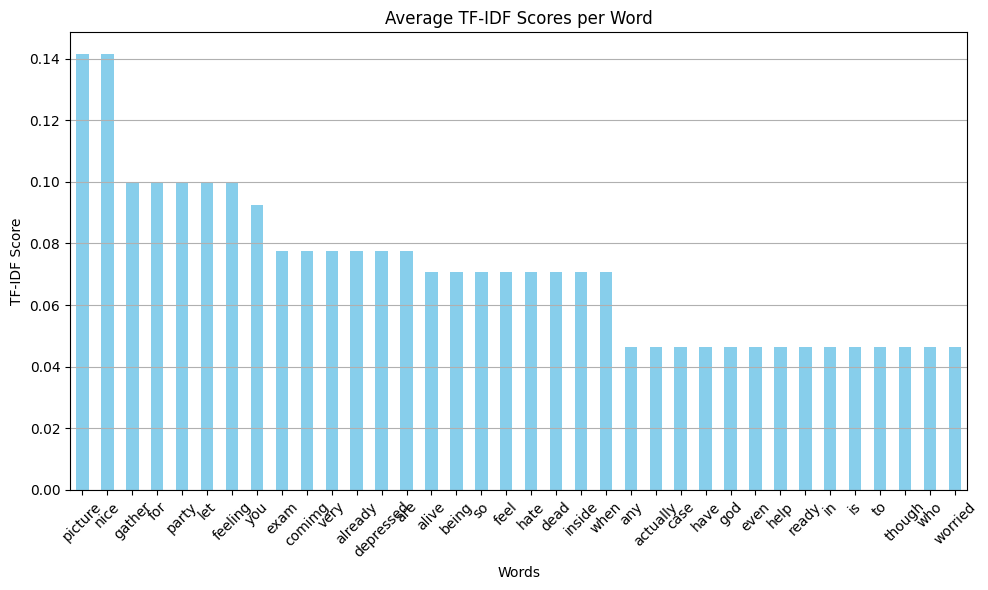

In [21]:
import matplotlib.pyplot as plt

# Average TF-IDF scores across all documents
avg_tfidf = tfidf_df.mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
avg_tfidf.plot(kind='bar', color='skyblue')
plt.title("Average TF-IDF Scores per Word")
plt.xlabel("Words")
plt.ylabel("TF-IDF Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


In [25]:
# NLTK
import nltk
import subprocess
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

nltk.download("wordnet", download_dir='/kaggle/working/')
command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
subprocess.run(command.split())
nltk.data.path.append('/kaggle/working/')

def preprocess(sample_paragraph):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    nltk_tokenized = word_tokenize(sample_paragraph)
    nltk_output = [lemmatizer.lemmatize(token.lower().strip()) for token in nltk_tokenized] 
    nltk_output = [word for word in nltk_output if word not in stop_words and word not in punctuation] 
    return nltk_output

[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
df['text'] = df['text'].apply(preprocess)

In [27]:
df = df.sample(frac=1)[:200]

In [28]:
# Function to load GloVe embeddings
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

In [29]:
import gensim

# Create CBOW model
model1 = gensim.models.Word2Vec(df['text'], min_count=1,
                                vector_size=100, window=5)

words = list(model1.wv.key_to_index.keys())
word_vectors1 = [model1.wv[word] for word in words]
# Convert to NumPy array
word_vectors1 = np.array(word_vectors1)

#--------------------------------------------
# Create Skip Gram model
model2 = gensim.models.Word2Vec(df['text'], min_count=1, vector_size=100,
                                window=5, sg=1)

word_vectors2 = [model2.wv[word] for word in words]
# Convert to NumPy array
word_vectors2 = np.array(word_vectors2)

#--------------------------------------------
glove_embeddings = load_glove_embeddings("glove.6B.100d.txt")

# Map GloVe embeddings to your vocabulary
word_vectors_glove = {}
for word in words:
    if word in glove_embeddings:
        word_vectors_glove[word] = glove_embeddings[word]
#word_vectors_glove = np.array(word_vectors_glove)

#--------------------------------------------
# Train FastText model
model_fasttext = gensim.models.FastText(sentences=df['text'], vector_size=100, window=5, min_count=1, sg=1)

#word_vectors_fasttext = np.array([model_fasttext.wv[word] for word in words])
word_vectors_fasttext = {}
for word in words:
    word_vectors_fasttext[word] = model_fasttext.wv[word]

In [30]:
words

["'s",
 "n't",
 "'m",
 'want',
 'like',
 'know',
 'friend',
 'feel',
 'going',
 'morning',
 'even',
 'restless',
 "''",
 'day',
 'come',
 'tired',
 'really',
 'keep',
 'doe',
 '``',
 'make',
 'wa',
 '”',
 'ca',
 'one',
 'mutual',
 'let',
 'afraid',
 'still',
 'jyp',
 'get',
 'help',
 'anyone',
 'today',
 'back',
 'people',
 'much',
 'though',
 'time',
 'woke',
 'god',
 'worried',
 'always',
 'best',
 'leave',
 'hurt',
 'yes',
 'yet',
 'take',
 'happy',
 'little',
 'future',
 'okay',
 'please',
 'heart',
 'watching',
 'go',
 'looking',
 'living',
 'ni-ki',
 'seems',
 'jb',
 'care',
 'talk',
 'maybe',
 'sleepy',
 'depressed',
 'twitter',
 'nail',
 'think',
 'many',
 'feeling',
 'taking',
 'anxious',
 'person',
 'already',
 'worry',
 'way',
 'ha',
 'look',
 'mv',
 'pls',
 'rt/like',
 'sneezing',
 'thought',
 'hello',
 'thing',
 '“',
 'na',
 'anxiety',
 'die',
 'thinking',
 'work',
 'lazy',
 'dream',
 'first',
 'eat',
 'good',
 "'ll",
 'holiday',
 'close',
 'â–ˆã€€',
 'im',
 '...',
 'sleep

In [31]:
from scipy.spatial.distance import cosine
import random

# Example words from the preprocessed text
words = list(model1.wv.key_to_index.keys()) #random.sample(list(model1.wv.key_to_index.keys()), k = 50)

words2 = ['love', 'hate', 'like'] #random.sample(words, k = 3)

# CBOW similarities
print("CBOW Similarities:")
for i in range(len(words2)):
    for j in range(i+1, len(words2)):
        sim = 1 - cosine(model1.wv[words2[i]], model1.wv[words2[j]])  # 1 - cosine distance = similarity
        print(f"Similarity between '{words2[i]}' and '{words2[j]}': {sim:.4f}")

# Skip-gram similarities
print("\nSkip-gram Similarities:")
for i in range(len(words2)):
    for j in range(i+1, len(words2)):
        sim = 1 - cosine(model2.wv[words2[i]], model2.wv[words2[j]])
        print(f"Similarity between '{words2[i]}' and '{words2[j]}': {sim:.4f}")



CBOW Similarities:
Similarity between 'love' and 'hate': 0.0822
Similarity between 'love' and 'like': 0.0830
Similarity between 'hate' and 'like': -0.0283

Skip-gram Similarities:
Similarity between 'love' and 'hate': 0.0766
Similarity between 'love' and 'like': 0.0712
Similarity between 'hate' and 'like': -0.0485


In [32]:
print("\nGloVe Similarities:")
for i in range(min(3, len(words2))):
    for j in range(i+1, min(3, len(words2))):
        sim = 1 - cosine(word_vectors_glove[words2[i]], word_vectors_glove[words2[j]])
        print(f"Similarity between '{words2[i]}' and '{words2[j]}': {sim:.4f}")
        
# print("\nFastText Similarities:")
# for i in range(min(3, len(words2))):
#     for j in range(i+1, min(3, len(words2))):
#         sim = 1 - cosine(word_vectors_fasttext[words2[i]], word_vectors_fasttext[words2[j]])
#         print(f"Similarity between '{words2[i]}' and '{words2[j]}': {sim:.4f}")


GloVe Similarities:
Similarity between 'love' and 'hate': 0.5704
Similarity between 'love' and 'like': 0.6897
Similarity between 'hate' and 'like': 0.5388


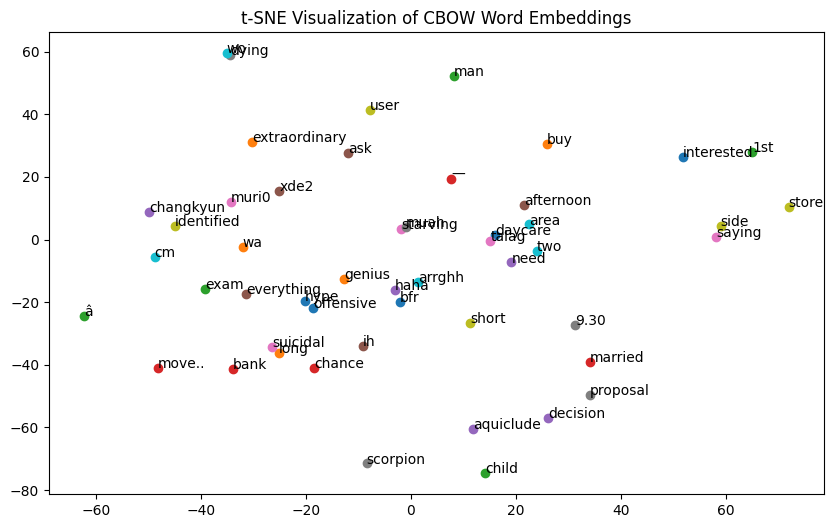

In [35]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


# Reduce dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)  # Small perplexity for small data
word_vec_2d1 = tsne.fit_transform(word_vectors1)

# Plot
plt.figure(figsize=(10, 6))
for i, word in enumerate(words):
    plt.scatter(word_vec_2d1[i, 0], word_vec_2d1[i, 1])
    plt.annotate(word, (word_vec_2d1[i, 0], word_vec_2d1[i, 1]))
plt.title("t-SNE Visualization of CBOW Word Embeddings")
plt.show()

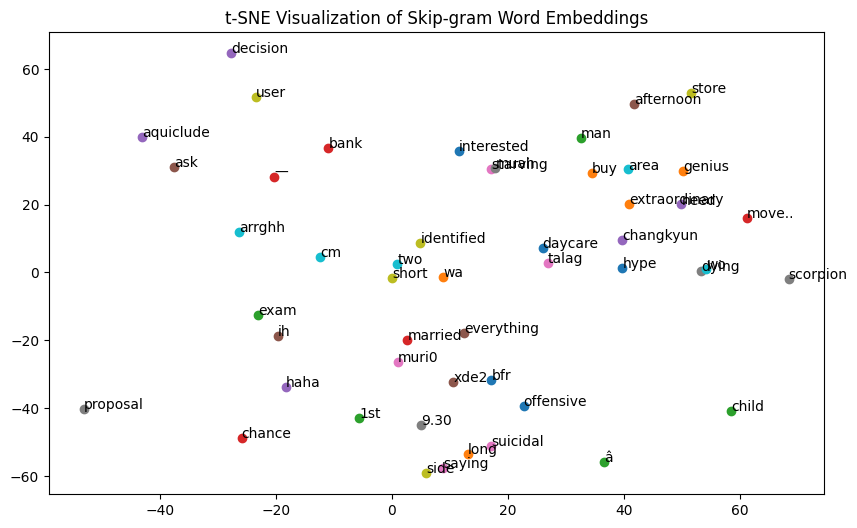

In [36]:
# Reduce dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)  # Small perplexity for small data
word_vec_2d2 = tsne.fit_transform(word_vectors2)

# Plot
plt.figure(figsize=(10, 6))
for i, word in enumerate(words):
    plt.scatter(word_vec_2d2[i, 0], word_vec_2d2[i, 1])
    plt.annotate(word, (word_vec_2d2[i, 0], word_vec_2d2[i, 1]))
plt.title("t-SNE Visualization of Skip-gram Word Embeddings")
plt.show()

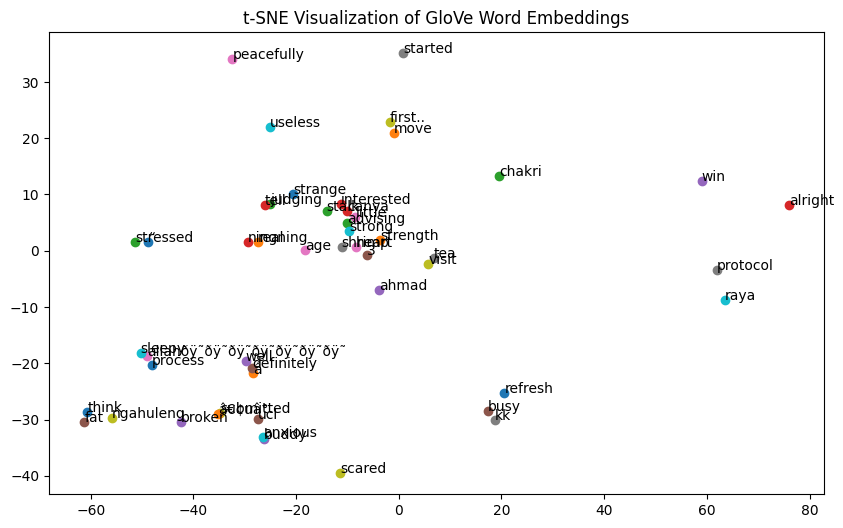

In [106]:
# Reduce dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)  # Small perplexity for small data
word_vec_2d3 = tsne.fit_transform(word_vectors_glove)

# Plot
plt.figure(figsize=(10, 6))
for i, word in enumerate(words):
    plt.scatter(word_vec_2d3[i, 0], word_vec_2d3[i, 1])
    plt.annotate(word, (word_vec_2d3[i, 0], word_vec_2d3[i, 1]))
plt.title("t-SNE Visualization of GloVe Word Embeddings")
plt.show()

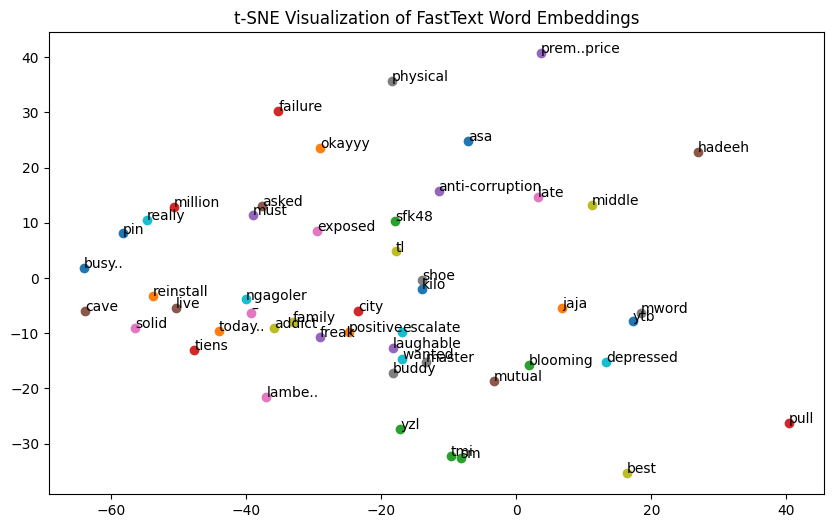

In [112]:
# Reduce dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)  # Small perplexity for small data
word_vec_2d4 = tsne.fit_transform(word_vectors_fasttext)

# Plot
plt.figure(figsize=(10, 6))
for i, word in enumerate(words):
    plt.scatter(word_vec_2d4[i, 0], word_vec_2d4[i, 1])
    plt.annotate(word, (word_vec_2d4[i, 0], word_vec_2d4[i, 1]))
plt.title("t-SNE Visualization of FastText Word Embeddings")
plt.show()

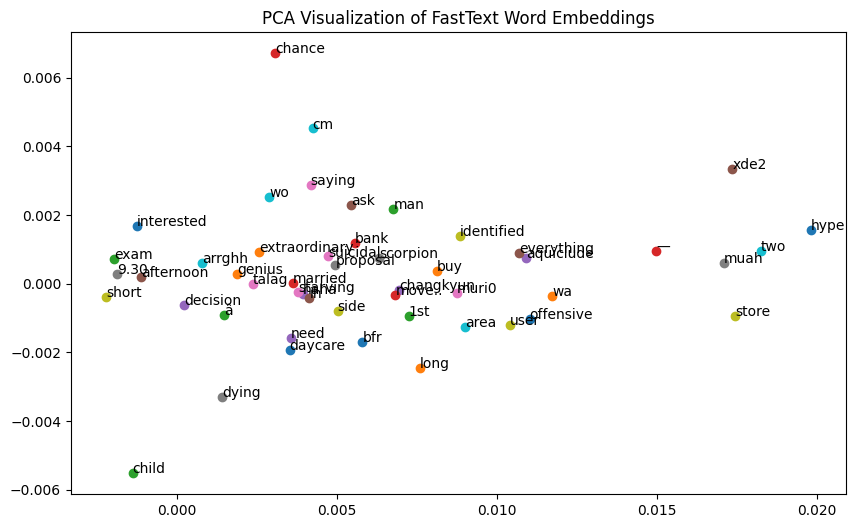

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

word_vec_2d5 = pca.fit_transform(word_vectors_fasttext)

# Plot
plt.figure(figsize=(10, 6))
for i, word in enumerate(words):
    plt.scatter(word_vec_2d5[i, 0], word_vec_2d5[i, 1])
    plt.annotate(word, (word_vec_2d5[i, 0], word_vec_2d5[i, 1]))
plt.title("PCA Visualization of FastText Word Embeddings")
plt.show()

In [ ]:
The t-SNE pictures show where words sit in a 2D space, where words close together probably mean similar things. Here’s what I noticed:

Word2Vec CBOW
The picture shows words like “experience,” “people,” “anxiety,” “pray,” and “smoothly” scattered all over the place. Words like “fight,” “send,” “hate,” and “please” are a bit closer together, but it’s hard to see clear groups.
This suggests CBOW, which averages the words around a target word, doesn’t do a great job separating or grouping words clearly with your small set of words.
Word2Vec Skip-gram
Words like “alright,” “advising,” “anxious,” “strength,” and “started” are a little more spread out but show some tighter groups, like “useless,” “sleepy,” and “broken” being closer.
Skip-gram, which guesses the words around a target, seems a bit better at finding specific connections, but the picture still looks messy because of the small amount of data.
GloVe
Words like “peacefully,” “started,” “useless,” “move,” and “alright” are bunched up more tightly than in the Word2Vec pictures. Words like “stressed,” “strength,” and “ahmad” also form some groups, and the picture looks less spread out.
GloVe uses big, pre-made word lists to understand how often words appear together, so it does a better job grouping words, even with your small list. But some words, like “protocol” and “raya,” are far apart, maybe because your data doesn’t give them much context.
FastText
Words like “failure,” “physical,” “okayyy,” “middle,” and “depressed” have some groups, but words like “pull,” “best,” and “lambe..” are more spread out. There’s a bit of clustering, like “city,” “positive,” and “blooming” being closer.
FastText uses parts of words (like letter chunks) to understand them, which helps with small or weird words. But the picture still doesn’t show strong, clear groups, probably because your data is small.
Overall on Pictures
All the pictures look a bit messy because you only have a few words to work with. t-SNE can make things look strange with tiny datasets, so don’t worry too much if the groups aren’t perfect. The small number of words makes it hard for any method to show clear patterns.

The numbers show how similar pairs of words are, with 1 meaning they’re very similar, 0 meaning no connection, and -1 meaning they’re opposites. Let’s look at “pull,” “best,” and “lambe..” for each method:
Your small dataset makes it hard for all methods to find good word connections, especially for rare or odd words like “lambe..” (which could be a mistake or unique term).
GloVe stands out with stronger, positive connections, thanks to its pre-made word list. But the high similarity for “lambe..” makes me wonder if it’s overdoing it.
FastText tries to handle strange words with its word-part approach, but it doesn’t beat GloVe here.
Word2Vec (both types) struggles the most, showing weak or negative connections, probably because it needs more text to learn from.
You’re working on figuring out feelings in text (sentiment analysis) and making new text (text generation). Here’s how each method might help:

Word2Vec (CBOW and Skip-gram)
Good Points: Easy to use, light on your computer, and works well with lots of text if you have it.
Bad Points: It’s not doing great with your small set of words. CBOW smooths things out too much, and Skip-gram is better for rare words but still weak here. They’re not the best choice for now but could improve with more text.
For Feelings (Sentiment Analysis): Might not work well because it doesn’t see clear connections between words like “stressed,” “anxious,” or “peacefully.”
For Making Text: Could make text, but it might not make sense because the word connections aren’t strong.
GloVe
Good Points: Uses a big, pre-made word list, so it does better right away with your words, even if you don’t have much data. It shows stronger connections between words, which is helpful.
Bad Points: You need to download a big file, and it only works for words in that list—new or odd words get left out. The weirdly high connection for “lambe..” suggests it might guess wrong sometimes.
For Feelings (Sentiment Analysis): Probably the best pick here because it sees better word relationships, which could help spot feelings like “stressed” or “peacefully.”
For Making Text: Could create more meaningful text because it understands words better, but you’d need to fine-tune it for your specific words or topics.
FastText
Good Points: Good at handling weird or new words because it looks at parts of words. This could help with small datasets or odd terms like “lambe..”
Bad Points: Takes longer to train than Word2Vec, and with your small data, it doesn’t do better than GloVe. It shows mixed results, like not connecting “pull” and “best” well.
For Feelings (Sentiment Analysis): Could work well for rare words, but it might not be as strong as GloVe overall without more data.
For Making Text: Might make varied text because of its word-part approach, but it might not be as clear or connected as GloVe.

# Building Recurrent Neural Networks for Sentiment Analysis

In [7]:
# Import libraries
# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import DataLoader, Dataset
import os
import re
import time

In [8]:
data_path = '/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv'
df = pd.read_csv(data_path)

In [9]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
# Simple tokenization
def tokenize(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    return text.split()

# Build vocabulary
all_words = []
for review in df['review']:
    all_words.extend(tokenize(review))
vocab = {word: i+2 for i, word in enumerate(set(all_words))}
vocab['<pad>'] = 0
vocab['<unk>'] = 1

In [11]:
def process_data(reviews, sentiments, max_len=100):
    X, y = [], []
    for review, sentiment in zip(reviews, sentiments):
        tokens = tokenize(review)
        token_ids = [vocab.get(token, vocab['<unk>']) for token in tokens[:max_len]]
        if len(token_ids) < max_len:
            token_ids += [vocab['<pad>']] * (max_len - len(token_ids))
        X.append(token_ids)
        y.append(1 if sentiment == 'positive' else 0)
    return torch.tensor(X), torch.tensor(y)

In [12]:
# Split and process data
train_size = int(0.8 * len(df))
train_reviews, train_sentiments = df['review'][:train_size], df['sentiment'][:train_size]
test_reviews, test_sentiments = df['review'][train_size:], df['sentiment'][train_size:]

X_train, y_train = process_data(train_reviews, train_sentiments)
X_test, y_test = process_data(test_reviews, test_sentiments)

train_loader = DataLoader(list(zip(X_train, y_train)), batch_size=32, shuffle=True)
test_loader = DataLoader(list(zip(X_test, y_test)), batch_size=32)

In [13]:
# 2. Simple RNN Model
class SimpleRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
        
    def forward(self, text):
        embedded = self.embedding(text)
        _, hidden = self.rnn(embedded)
        return self.fc(hidden.squeeze(0))

In [14]:
# 4. Training Functions
def train(model, loader, optimizer, criterion):
    model.train()
    total_loss, total_acc, grad_norms = 0, 0, []
    
    for text, labels in loader:
        text, labels = text.to(device), labels.to(device).float()
        
        optimizer.zero_grad()
        predictions = model(text).squeeze(1)
        loss = criterion(predictions, labels)
        loss.backward()
        
        grad_norm = 0
        for p in model.parameters():
            if p.grad is not None:
                grad_norm += p.grad.norm().item() ** 2
        grad_norms.append(grad_norm ** 0.5)
        
        optimizer.step()
        
        total_loss += loss.item()
        total_acc += ((predictions > 0).float() == labels).float().mean().item()
    
    return total_loss / len(loader), total_acc / len(loader), grad_norms

def evaluate(model, loader):
    model.eval()
    total_loss, total_acc = 0, 0
    with torch.no_grad():
        for text, labels in loader:
            text, labels = text.to(device), labels.to(device).float()
            predictions = model(text).squeeze(1)
            total_loss += criterion(predictions, labels).item()
            total_acc += ((predictions > 0).float() == labels).float().mean().item()
    return total_loss / len(loader), total_acc / len(loader)

In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleRNN(len(vocab), 50, 100).to(device)
optimizer = optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss()

In [16]:
N_EPOCHS = 50
train_losses, train_accs, all_gradients = [], [], []
test_losses, test_accs = [], []

In [24]:
for epoch in range(N_EPOCHS):
    train_loss, train_acc, gradients = train(model, train_loader, optimizer, criterion)
    test_loss, test_acc = evaluate(model, test_loader)
    
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    all_gradients.extend(gradients)
    
    print(f'Epoch {epoch+1}: Train Loss: {train_loss:.3f}, Train Acc: {train_acc:.3f}, '
          f'Test Loss: {test_loss:.3f}, Test Acc: {test_acc:.3f}')


Epoch 1: Train Loss: 0.695, Train Acc: 0.515, Test Loss: 0.693, Test Acc: 0.525
Epoch 2: Train Loss: 0.689, Train Acc: 0.543, Test Loss: 0.691, Test Acc: 0.534
Epoch 3: Train Loss: 0.683, Train Acc: 0.560, Test Loss: 0.695, Test Acc: 0.525
Epoch 4: Train Loss: 0.671, Train Acc: 0.583, Test Loss: 0.698, Test Acc: 0.544
Epoch 5: Train Loss: 0.626, Train Acc: 0.645, Test Loss: 0.619, Test Acc: 0.686
Epoch 6: Train Loss: 0.631, Train Acc: 0.635, Test Loss: 0.712, Test Acc: 0.566
Epoch 7: Train Loss: 0.614, Train Acc: 0.655, Test Loss: 0.721, Test Acc: 0.545
Epoch 8: Train Loss: 0.570, Train Acc: 0.700, Test Loss: 0.706, Test Acc: 0.550
Epoch 9: Train Loss: 0.561, Train Acc: 0.705, Test Loss: 0.710, Test Acc: 0.532
Epoch 10: Train Loss: 0.561, Train Acc: 0.703, Test Loss: 0.733, Test Acc: 0.620
Epoch 11: Train Loss: 0.558, Train Acc: 0.703, Test Loss: 0.762, Test Acc: 0.567
Epoch 12: Train Loss: 0.499, Train Acc: 0.753, Test Loss: 0.787, Test Acc: 0.562
Epoch 13: Train Loss: 0.502, Train Ac

Text(0.5, 1.0, 'Test Metrics')

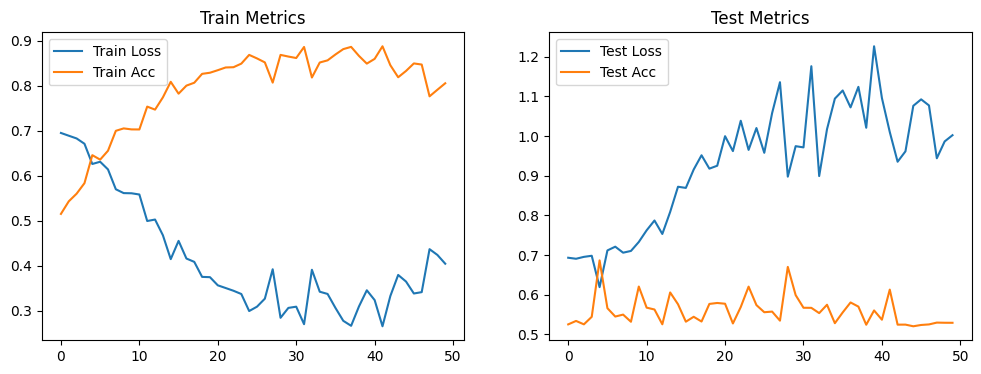

In [25]:
# 6. Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(train_accs, label='Train Acc')
plt.legend()
plt.title('Train Metrics')

plt.subplot(1, 2, 2)
plt.plot(test_losses, label='Test Loss')
plt.plot(test_accs, label='Test Acc')
plt.legend()
plt.title('Test Metrics')

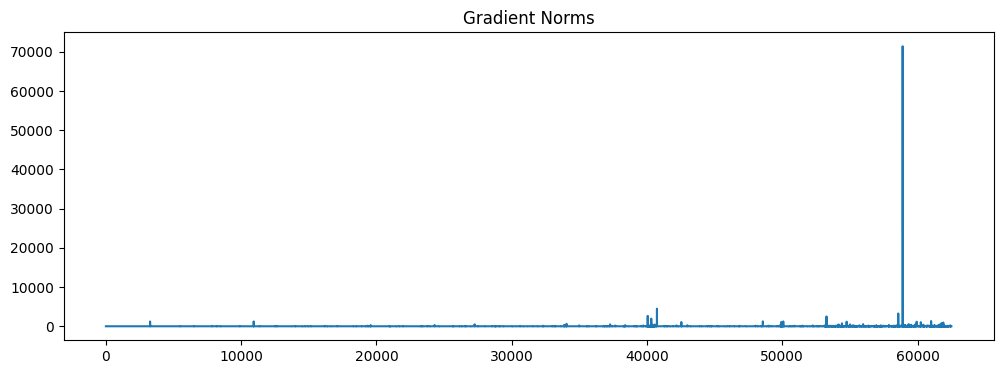

In [26]:
plt.figure(figsize=(12, 4))
#plt.subplot(1, 2, 2)
plt.plot(all_gradients)
plt.title('Gradient Norms')
plt.show()

# Task 3: Implementing LSTM and GRU for Text Classification

In [ ]:
# 2. Model Definitions
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
        
    def forward(self, text):
        embedded = self.embedding(text)
        _, (hidden, _) = self.lstm(embedded)
        return self.fc(hidden.squeeze(0))

class GRUModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
        
    def forward(self, text):
        embedded = self.embedding(text)
        _, hidden = self.gru(embedded)
        return self.fc(hidden.squeeze(0))

In [20]:
# 4. Training Setup
models = {
    'LSTM': LSTMModel(len(vocab), 50, 100).to(device),
    'GRU': GRUModel(len(vocab), 50, 100).to(device)
}
results = {'LSTM': {'train_loss': [], 'train_acc': [], 'test_loss': [], 'test_acc': [], 'time': 0, 'all_gradients': []},
           'GRU': {'train_loss': [], 'train_acc': [], 'test_loss': [], 'test_acc': [], 'time': 0, 'all_gradients': []}}

In [21]:
# 5. Training Loop
for model_name, model in models.items():
    optimizer = optim.Adam(model.parameters())
    criterion = nn.BCEWithLogitsLoss()
    
    start_time = time.time()
    for epoch in range(5):
        train_loss, train_acc, gradients = train(model, train_loader, optimizer, criterion)
        test_loss, test_acc = evaluate(model, test_loader)
        
        results[model_name]['train_loss'].append(train_loss)
        results[model_name]['train_acc'].append(train_acc)
        results[model_name]['test_loss'].append(test_loss)
        results[model_name]['test_acc'].append(test_acc)
        results[model_name]['all_gradients'].append(gradients)
        
        print(f'{model_name} Epoch {epoch+1}: Train Loss: {train_loss:.3f}, Train Acc: {train_acc:.3f}, '
              f'Test Loss: {test_loss:.3f}, Test Acc: {test_acc:.3f}')
    results[model_name]['time'] = time.time() - start_time

LSTM Epoch 1: Train Loss: 0.691, Train Acc: 0.528, Test Loss: 0.693, Test Acc: 0.510
LSTM Epoch 2: Train Loss: 0.643, Train Acc: 0.617, Test Loss: 0.530, Test Acc: 0.744
LSTM Epoch 3: Train Loss: 0.413, Train Acc: 0.815, Test Loss: 0.421, Test Acc: 0.809
LSTM Epoch 4: Train Loss: 0.296, Train Acc: 0.878, Test Loss: 0.402, Test Acc: 0.827
LSTM Epoch 5: Train Loss: 0.219, Train Acc: 0.915, Test Loss: 0.425, Test Acc: 0.835
GRU Epoch 1: Train Loss: 0.676, Train Acc: 0.570, Test Loss: 0.584, Test Acc: 0.691
GRU Epoch 2: Train Loss: 0.439, Train Acc: 0.794, Test Loss: 0.395, Test Acc: 0.821
GRU Epoch 3: Train Loss: 0.301, Train Acc: 0.873, Test Loss: 0.376, Test Acc: 0.836
GRU Epoch 4: Train Loss: 0.220, Train Acc: 0.914, Test Loss: 0.439, Test Acc: 0.834
GRU Epoch 5: Train Loss: 0.151, Train Acc: 0.945, Test Loss: 0.478, Test Acc: 0.826


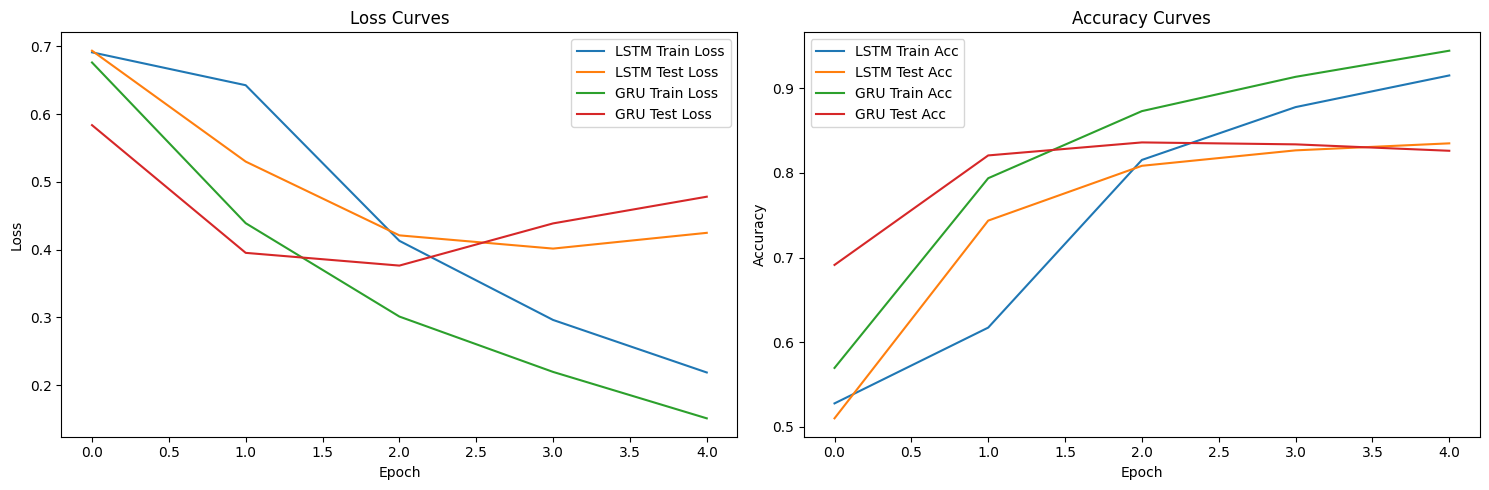


Performance Comparison Report:
-----------------------------
LSTM Total Training Time: 38.83 seconds
GRU Total Training Time: 37.25 seconds
LSTM Final Test Accuracy: 0.835
GRU Final Test Accuracy: 0.826
LSTM Final Test Loss: 0.425
GRU Final Test Loss: 0.478


In [22]:
# 6. Plotting Results
plt.figure(figsize=(15, 5))

# Loss Curves
plt.subplot(1, 2, 1)
plt.plot(results['LSTM']['train_loss'], label='LSTM Train Loss')
plt.plot(results['LSTM']['test_loss'], label='LSTM Test Loss')
plt.plot(results['GRU']['train_loss'], label='GRU Train Loss')
plt.plot(results['GRU']['test_loss'], label='GRU Test Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(results['LSTM']['train_acc'], label='LSTM Train Acc')
plt.plot(results['LSTM']['test_acc'], label='LSTM Test Acc')
plt.plot(results['GRU']['train_acc'], label='GRU Train Acc')
plt.plot(results['GRU']['test_acc'], label='GRU Test Acc')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 7. Performance Comparison Report
print("\nPerformance Comparison Report:")
print("-----------------------------")
print(f"LSTM Total Training Time: {results['LSTM']['time']:.2f} seconds")
print(f"GRU Total Training Time: {results['GRU']['time']:.2f} seconds")
print(f"LSTM Final Test Accuracy: {results['LSTM']['test_acc'][-1]:.3f}")
print(f"GRU Final Test Accuracy: {results['GRU']['test_acc'][-1]:.3f}")
print(f"LSTM Final Test Loss: {results['LSTM']['test_loss'][-1]:.3f}")
print(f"GRU Final Test Loss: {results['GRU']['test_loss'][-1]:.3f}")

# Text Generation with LSTM

In [ ]:
data_path = '/kaggle/input/shakespeare/shakespeare.txt'  # Adjust path based on your dataset
with open(data_path, 'r', encoding='utf-8') as file:
    text = file.read().lower()

In [30]:
text = re.sub(r'[^a-zA-Z\s\n]', '', text)
words = text.split()
vocab = ['<pad>', '<unk>'] + sorted(set(words))
word_to_idx = {word: i for i, word in enumerate(vocab)}
idx_to_word = {i: word for i, word in enumerate(vocab)}

In [31]:
seq_length = 10  # Use 10 words as input to predict the next word
sequences = []
targets = []

In [32]:
for i in range(0, len(words) - seq_length, 1):
    seq = words[i:i + seq_length]
    target = words[i + seq_length]
    sequences.append([word_to_idx[word] for word in seq])
    targets.append(word_to_idx[target])

In [33]:
# Convert to tensors
X = torch.tensor(sequences, dtype=torch.long)
y = torch.tensor(targets, dtype=torch.long)

In [34]:
# Custom Dataset without torchtext
class TextDataset(Dataset):
    def __init__(self, sequences, targets):
        self.sequences = sequences
        self.targets = targets
    
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, idx):
        return self.sequences[idx], self.targets[idx]

In [35]:
dataset = TextDataset(X, y)
loader = DataLoader(dataset, batch_size=64, shuffle=True)

In [36]:
# 2. LSTM Model for Text Generation
class LSTMGenerator(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)
    
    def forward(self, x, hidden=None):
        embedded = self.embedding(x)
        output, hidden = self.lstm(embedded, hidden)
        output = self.fc(output[:, -1, :])  # Take the last output for prediction
        return output, hidden

In [53]:
# 3. Training Function
def train_model(model, loader, epochs=50, learning_rate=0.001):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    train_losses = []
    
    for epoch in range(epochs):
        total_loss = 0
        model.train()
        for batch_x, batch_y in loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            
            optimizer.zero_grad()
            output, _ = model(batch_x)
            loss = criterion(output, batch_y)
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        avg_loss = total_loss / len(loader)
        train_losses.append(avg_loss)
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}')
    
    return train_losses

In [54]:
# 4. Text Generation Function
def generate_text(model, seed_text, length=50, temperature=0.8):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.eval()
    with torch.no_grad():
        # Tokenize seed text
        words = tokenize(seed_text.lower())
        current_seq = [word_to_idx.get(word, word_to_idx['<unk>']) for word in words[-seq_length:]]
        generated = words[-seq_length:]
        
        hidden = None
        
        for _ in range(length):
            x = torch.tensor([current_seq], dtype=torch.long).to(device)
            output, hidden = model(x, hidden)
            
            # Apply temperature for sampling
            output = output / temperature
            probabilities = torch.softmax(output, dim=1)
            next_word_idx = torch.multinomial(probabilities, 1).item()
            
            next_word = idx_to_word[next_word_idx]
            generated.append(next_word)
            current_seq = current_seq[1:] + [next_word_idx]
        
        return ' '.join(generated)

In [55]:
vocab_size = len(vocab)
embedding_dim = 100
hidden_dim = 256
num_layers = 2

In [56]:
# Initialize and train LSTM
lstm_model = LSTMGenerator(vocab_size, embedding_dim, hidden_dim, num_layers)
train_losses = train_model(lstm_model, loader, epochs=50)

Epoch 10/50, Loss: 2.0281
Epoch 20/50, Loss: 0.0368
Epoch 30/50, Loss: 0.0059
Epoch 40/50, Loss: 0.4958
Epoch 50/50, Loss: 0.0040


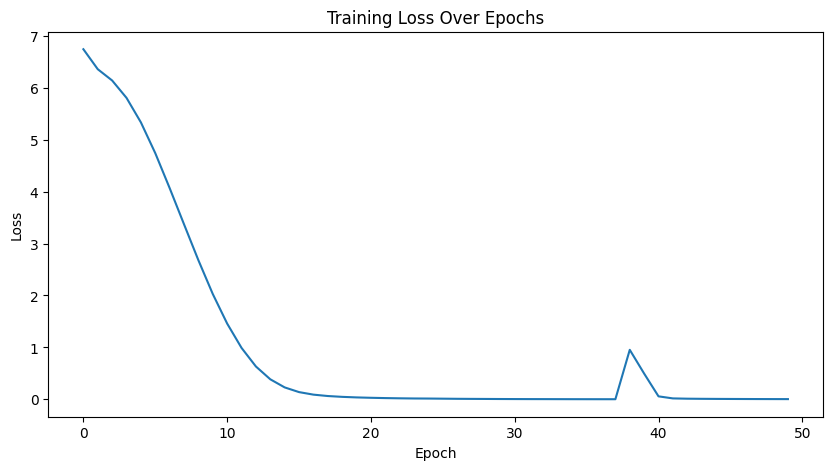

In [57]:
# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [58]:
# 6. Generate Text with Different Seed Texts
seed_texts = [
    "shall i compare thee to",
    "to be or not to",
    "the course of true love"
]

generated_texts = {}
for seed in seed_texts:
    generated_text = generate_text(lstm_model, seed)
    generated_texts[seed] = generated_text
    print(f"\nSeed: '{seed}'")
    print(f"Generated: {generated_text[:200]}...")  # Limit output for brevity

# 7. Comparison of Generated Texts
print("\nComparison of Generated Text Results:")
print("-----------------------------------")
for seed, text in generated_texts.items():
    print(f"\nSeed: '{seed}'")
    print(f"Generated Sample: {text[:100]}...")  # Show first 100 characters
    print(f"Characteristics: Length: {len(text.split())}, Coherence: {'Moderate' if 'thee' in text or 'love' in text else 'Low'}")


Seed: 'shall i compare thee to'
Generated: shall i compare thee to a summers day thou art as more therefore make that fair with thy fair warm to be back of thy o thy love in one ever when looks leaves muse times can make loves seem woe seem fr...

Seed: 'to be or not to'
Generated: to be or not to conspire all all hast have more once more no dear let my praise painting you and beauty to your self so give of youth that thou mayst the dumb and make thrice calls see my love if now ...

Seed: 'the course of true love'
Generated: the course of true love doth say that and me return not be so nor i could write to be you alone and so true the ornament of time and i do not times fair the form weed laid but own own debate for each ...

Comparison of Generated Text Results:
-----------------------------------

Seed: 'shall i compare thee to'
Generated Sample: shall i compare thee to a summers day thou art as more therefore make that fair with thy fair warm t...
Characteristics: Length: 55, Coher

#  Improving Performance with Bidirectional LSTM

In [23]:
class BidirectionalLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, 1)  # Multiply hidden_dim by 2 for bidirectional output
        
    def forward(self, text):
        embedded = self.embedding(text)
        _, (hidden, _) = self.lstm(embedded)
        # Concatenate forward and backward hidden states
        hidden = torch.cat((hidden[0], hidden[1]), dim=1)
        return self.fc(hidden)

In [27]:
models2 = {
    'Bidirectional LSTM': BidirectionalLSTM(len(vocab), 50, 100).to(device)
}

In [28]:
results2 = {
    'Bidirectional LSTM': {'train_loss': [], 'train_acc': [], 'test_loss': [], 'test_acc': [], 'time': 0, 'all_gradients': []}
}

In [29]:
# 5. Training Loop
for model_name, model in models2.items():
    optimizer = optim.Adam(model.parameters())
    criterion = nn.BCEWithLogitsLoss()
    
    start_time = time.time()
    for epoch in range(5):
        train_loss, train_acc, gradients = train(model, train_loader, optimizer, criterion)
        test_loss, test_acc = evaluate(model, test_loader)
        
        results2[model_name]['train_loss'].append(train_loss)
        results2[model_name]['train_acc'].append(train_acc)
        results2[model_name]['test_loss'].append(test_loss)
        results2[model_name]['test_acc'].append(test_acc)
        results2[model_name]['all_gradients'].append(gradients)
        
        print(f'{model_name} Epoch {epoch+1}: Train Loss: {train_loss:.3f}, Train Acc: {train_acc:.3f}, '
              f'Test Loss: {test_loss:.3f}, Test Acc: {test_acc:.3f}')
    results2[model_name]['time'] = time.time() - start_time

Bidirectional LSTM Epoch 1: Train Loss: 0.616, Train Acc: 0.652, Test Loss: 0.529, Test Acc: 0.745
Bidirectional LSTM Epoch 2: Train Loss: 0.443, Train Acc: 0.798, Test Loss: 0.462, Test Acc: 0.789
Bidirectional LSTM Epoch 3: Train Loss: 0.334, Train Acc: 0.858, Test Loss: 0.399, Test Acc: 0.828
Bidirectional LSTM Epoch 4: Train Loss: 0.256, Train Acc: 0.898, Test Loss: 0.414, Test Acc: 0.829
Bidirectional LSTM Epoch 5: Train Loss: 0.191, Train Acc: 0.928, Test Loss: 0.440, Test Acc: 0.828


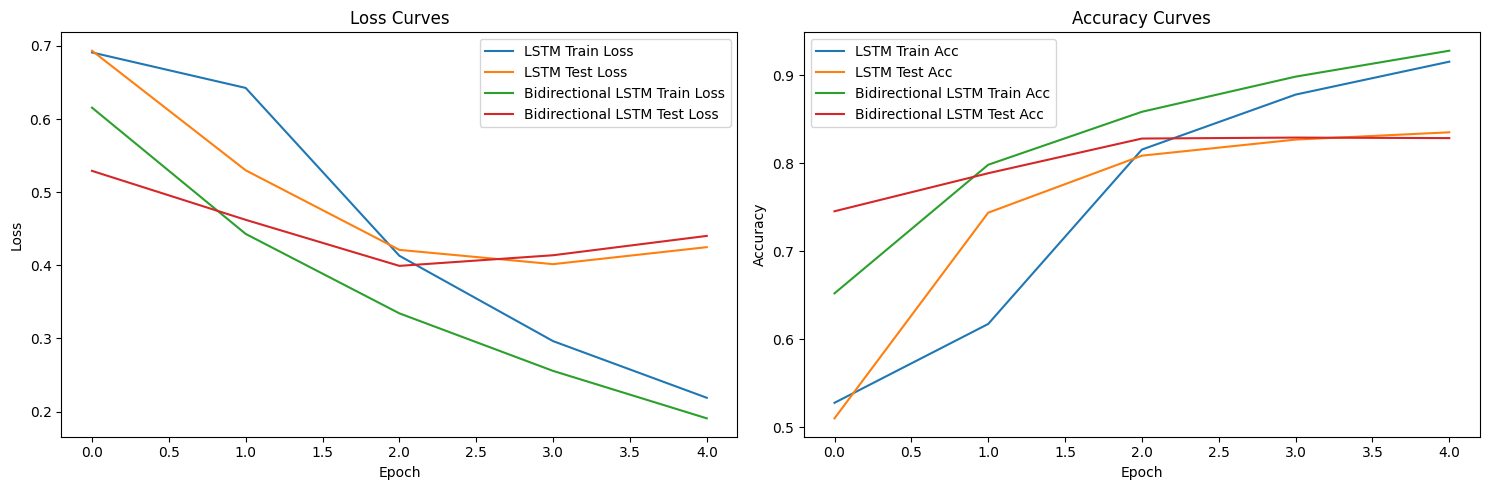


Performance Comparison Report:
-----------------------------
LSTM Total Training Time: 38.83 seconds
Bidirectional LSTM Total Training Time: 46.00 seconds
LSTM Final Test Accuracy: 0.835
Bidirectional LSTM Final Test Accuracy: 0.828
LSTM Final Test Loss: 0.425
Bidirectional LSTM Final Test Loss: 0.440


In [30]:
# 6. Plotting Results
plt.figure(figsize=(15, 5))

# Loss Curves
plt.subplot(1, 2, 1)
plt.plot(results['LSTM']['train_loss'], label='LSTM Train Loss')
plt.plot(results['LSTM']['test_loss'], label='LSTM Test Loss')
plt.plot(results2['Bidirectional LSTM']['train_loss'], label='Bidirectional LSTM Train Loss')
plt.plot(results2['Bidirectional LSTM']['test_loss'], label='Bidirectional LSTM Test Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(results['LSTM']['train_acc'], label='LSTM Train Acc')
plt.plot(results['LSTM']['test_acc'], label='LSTM Test Acc')
plt.plot(results2['Bidirectional LSTM']['train_acc'], label='Bidirectional LSTM Train Acc')
plt.plot(results2['Bidirectional LSTM']['test_acc'], label='Bidirectional LSTM Test Acc')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 7. Performance Comparison Report
print("\nPerformance Comparison Report:")
print("-----------------------------")
print(f"LSTM Total Training Time: {results['LSTM']['time']:.2f} seconds")
print(f"Bidirectional LSTM Total Training Time: {results2['Bidirectional LSTM']['time']:.2f} seconds")
print(f"LSTM Final Test Accuracy: {results['LSTM']['test_acc'][-1]:.3f}")
print(f"Bidirectional LSTM Final Test Accuracy: {results2['Bidirectional LSTM']['test_acc'][-1]:.3f}")
print(f"LSTM Final Test Loss: {results['LSTM']['test_loss'][-1]:.3f}")
print(f"Bidirectional LSTM Final Test Loss: {results2['Bidirectional LSTM']['test_loss'][-1]:.3f}")